# 🌼 AI Flower Classification Project
This notebook includes all the steps: data collection, preprocessing, model training, evaluation, and visualization.

In [ ]:
# 📦 Install required packages
# Run this cell only once (or if needed)
!pip install tensorflow==2.10 keras opencv-python matplotlib scikit-learn tqdm icrawler


^C


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 3.19.6 which is incompatible.


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
from icrawler.builtin import BingImageCrawler
import os
import time

def download_bing_images(keyword, output_dir, max_num=500):
    print(f"🔍 Downloading: {keyword}")
    os.makedirs(output_dir, exist_ok=True)

    try:
        crawler = BingImageCrawler(
            storage={'root_dir': output_dir},
            downloader_threads=4,
            parser_threads=2,
            log_level='INFO'
        )
        crawler.crawl(keyword=keyword, max_num=max_num)
        print(f"✅ Done: {keyword} -> {output_dir}")
    except Exception as e:
        print(f"❌ Failed: {keyword} — {e}")

# Flower keywords
flower_keywords = {
    "rose": ["rose flower", "red rose", "pink rose", "white rose", "wild rose"],
    "sunflower": ["sunflower bloom", "sunflower field", "yellow sunflower", "sunflower garden", "sunflower wallpaper"],
    "tulip": ["tulip flower", "red tulip", "tulip field", "colorful tulip", "tulip close-up"],
    "dandelion": ["dandelion macro", "dandelion puff", "dandelion seeds", "dandelion flower", "yellow dandelion"],
    "orchid": ["orchid flower", "purple orchid", "exotic orchid", "white orchid", "pink orchid"],
    "hibiscus": ["hibiscus flower", "red hibiscus", "hibiscus plant", "hibiscus macro", "pink hibiscus"],
    "lily": ["lily flower", "white lily", "tiger lily", "pink lily", "lily garden"],
    "lotus": ["lotus flower", "pink lotus", "white lotus", "lotus bloom", "lotus closeup"],
    "jasmine": ["jasmine flower", "white jasmine", "jasmine plant", "jasmine garden", "jasmine macro"],
    "lavender": ["lavender flower", "lavender field", "purple lavender", "lavender closeup", "lavender bunch"]
}

# Start download
for flower, keyword_list in flower_keywords.items():
    for term in keyword_list:
        output_path = f"../data/{flower}"
        download_bing_images(term, output_path, max_num=500)
        time.sleep(2)  # Pause to avoid rate limit


In [ ]:
from icrawler.builtin import GoogleImageCrawler
import os
import time
from tqdm import tqdm

def download_google_images(keyword, output_dir, max_num=500):
    """Download images with error handling and progress tracking"""
    print(f"🔍 Downloading: {keyword}")
    os.makedirs(output_dir, exist_ok=True)
    
    try:
        crawler = GoogleImageCrawler(
            storage={'root_dir': output_dir},
            downloader_threads=8,  # Increased threads for faster download
            parser_threads=4,
            log_level='ERROR'  # Reduce log noise
        )
        
        # Add retry logic
        max_retries = 3
        for attempt in range(max_retries):
            try:
                crawler.crawl(keyword=keyword, max_num=max_num)
                break
            except Exception as e:
                print(f"⚠️ Attempt {attempt + 1} failed for {keyword}: {e}")
                if attempt == max_retries - 1:
                    print(f"❌ Failed to download {keyword} after {max_retries} attempts")
                    return 0
                time.sleep(2)  # Wait before retry
        
        # Count downloaded images
        downloaded_count = len([f for f in os.listdir(output_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))])
        print(f"✅ Downloaded {downloaded_count} images for {keyword}")
        return downloaded_count
        
    except Exception as e:
        print(f"❌ Error downloading {keyword}: {e}")
        return 0

# 🎯 Enhanced keywords for better diversity (targeting ~1000 images per class)
flower_keywords = {
    "rose": ["rose flower", "red rose", "pink rose", "white rose", "yellow rose", "rose garden", "rose bouquet"],
    "sunflower": ["sunflower bloom", "sunflower field", "yellow sunflower", "sunflower close up", "giant sunflower", "sunflower garden"],
    "tulip": ["tulip flower", "tulip garden", "colorful tulips", "red tulip", "yellow tulip", "pink tulip", "tulip field"],
    "dandelion": ["dandelion flower", "dandelion macro", "dandelion seeds", "yellow dandelion", "dandelion meadow", "dandelion close up"],
    "orchid": ["orchid flower", "purple orchid", "white orchid", "pink orchid", "exotic orchid", "orchid bloom", "tropical orchid"],
    "hibiscus": ["hibiscus flower", "red hibiscus", "tropical hibiscus", "pink hibiscus", "yellow hibiscus", "hibiscus bloom"],
    "lily": ["lily flower", "white lily", "pink lily", "orange lily", "water lily", "lily bloom", "tiger lily"],
    "lotus": ["lotus flower", "pink lotus", "lotus blossom", "white lotus", "lotus pond", "sacred lotus", "lotus bloom"],
    "jasmine": ["jasmine flower", "white jasmine", "jasmine plant", "jasmine bloom", "star jasmine", "night jasmine"],
    "lavender": ["lavender flower", "lavender field", "purple lavender", "lavender bloom", "english lavender", "lavender garden"]
}

# 📊 Track download statistics
total_downloaded = 0
class_stats = {}

print("🚀 Starting enhanced image collection...")
print(f"📊 Target: ~10,000 images across {len(flower_keywords)} classes")

# 🧹 Download with progress tracking
for flower, keyword_list in tqdm(flower_keywords.items(), desc="Classes"):
    class_total = 0
    print(f"\n🌸 Processing {flower.upper()}...")
    
    for i, term in enumerate(tqdm(keyword_list, desc=f"{flower} keywords", leave=False)):
        output_path = f"../data/{flower}"
        # Download more images per keyword to reach target
        downloaded = download_google_images(term, output_path, max_num=150)
        class_total += downloaded
        
        # Add delay to avoid rate limiting
        if i < len(keyword_list) - 1:
            time.sleep(1)
    
    class_stats[flower] = class_total
    total_downloaded += class_total
    print(f"📈 {flower}: {class_total} images")

# 📊 Final statistics
print(f"\n🎉 Collection Complete!")
print(f"📊 Total images downloaded: {total_downloaded}")
print(f"📊 Average per class: {total_downloaded // len(flower_keywords)}")
print("\n📋 Class breakdown:")
for flower, count in class_stats.items():
    print(f"  {flower}: {count} images")

# Save statistics
os.makedirs('../output', exist_ok=True)
with open('../output/download_stats.txt', 'w') as f:
    f.write(f"Total images: {total_downloaded}\n")
    f.write(f"Classes: {len(flower_keywords)}\n")
    for flower, count in class_stats.items():
        f.write(f"{flower}: {count}\n")

print(f"\n💾 Statistics saved to ../output/download_stats.txt")

In [3]:
# ⚙️ Train Models (ResNet50, DenseNet121, MobileNetV3)
import os
import time
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras import layers, models

def train_model(model_name, base_model, input_shape=(224,224,3), data_dir='../dataset'):
    # Create data generators
    datagen = ImageDataGenerator(rescale=1./255)

    train = datagen.flow_from_directory(
        f"{data_dir}/train", target_size=input_shape[:2], batch_size=32)
    val = datagen.flow_from_directory(
        f"{data_dir}/val", target_size=input_shape[:2], batch_size=32)
    test = datagen.flow_from_directory(
        f"{data_dir}/test", target_size=input_shape[:2], batch_size=32, shuffle=False)

    # Load base model with pretrained weights
    base = base_model(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False  # freeze base model

    # Build custom model
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(train.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train and time the process
    start = time.time()
    history = model.fit(train, validation_data=val, epochs=50)
    end = time.time()
    training_time = round(end - start)

    # Save the trained model to the /models folder
    os.makedirs('../models', exist_ok=True)
    model.save(f'../models/{model_name}.h5')

    print(f"✅ Model saved as ../models/{model_name}.h5")
    print(f"🕒 Training Time for {model_name}: {training_time} seconds")

    return model, history, test, training_time


def calculate_mAP(model, test_data):
    y_score = model.predict(test_data)
    y_true = test_data.classes
    y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=y_score.shape[1])
    mAP = average_precision_score(y_true_one_hot, y_score, average='macro')
    return round(mAP * 100, 2)



In [4]:
# 1. Define helper functions (e.g., train_model, calculate_mAP)
# 2. Train models & calculate mAP

resnet_model, resnet_history, resnet_test, resnet_time = train_model("ResNet50", ResNet50)
resnet_mAP = calculate_mAP(resnet_model, resnet_test)

densenet_model, densenet_history, densenet_test, densenet_time = train_model("DenseNet121", DenseNet121)
densenet_mAP = calculate_mAP(densenet_model, densenet_test)

mobilenet_model, mobilenet_history, mobilenet_test, mobilenet_time = train_model("MobileNetV3", MobileNetV3Small)
mobilenet_mAP = calculate_mAP(mobilenet_model, mobilenet_test)

# 3. ⬇️ Place the code BELOW here:
results = {
    'Model': ['ResNet50', 'DenseNet121', 'MobileNetV3'],
    'Val Accuracy (%)': [
        resnet_history.history['val_accuracy'][-1] * 100,
        densenet_history.history['val_accuracy'][-1] * 100,
        mobilenet_history.history['val_accuracy'][-1] * 100,
    ],
    'mAP (%)': [resnet_mAP, densenet_mAP, mobilenet_mAP],
    'Training Time (s)': [resnet_time, densenet_time, mobilenet_time],
    'Parameters (M)': [25, 8, 2.5],
    'Notes': ['Best accuracy', 'Lightweight', 'Fastest']
}

df = pd.DataFrame(results)
os.makedirs('../output', exist_ok=True)
df.to_csv('../output/model_summary_with_mAP.csv', index=False)


# Example: Compute mAP for each model
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

def compute_map(model, test_data):
    y_true = test_data.classes
    y_true_cat = to_categorical(y_true, num_classes=len(test_data.class_indices))
    y_pred = model.predict(test_data)
    mAP = average_precision_score(y_true_cat, y_pred, average='macro') * 100
    return round(mAP, 2)

resnet_mAP = compute_map(resnet_model, resnet_test)
densenet_mAP = compute_map(densenet_model, densenet_test)
mobilenet_mAP = compute_map(mobilenet_model, mobilenet_test)


Found 2218 images belonging to 10 classes.
Found 777 images belonging to 10 classes.
Found 815 images belonging to 10 classes.
Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 2.1475 - accuracy: 0.2160

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 237s 3s/step - loss: 2.1475 - accuracy: 0.2160 - val_loss: 2.1176 - val_accuracy: 0.1969
Epoch 2/50
70/70 [==============================] - 232s 3s/step - loss: 2.0167 - accuracy: 0.2529 - val_loss: 1.9607 - val_accuracy: 0.2651
Epoch 3/50
70/70 [==============================] - 226s 3s/step - loss: 1.9689 - accuracy: 0.2647 - val_loss: 1.9544 - val_accuracy: 0.3140
Epoch 4/50
70/70 [==============================] - 231s 3s/step - loss: 1.9361 - accuracy: 0.2786 - val_loss: 2.0288 - val_accuracy: 0.2239
Epoch 5/50
70/70 [==============================] - 237s 3s/step - loss: 1.9099 - accuracy: 0.3246 - val_loss: 1.8632 - val_accuracy: 0.3230
Epoch 6/50
70/70 [==============================] - 224s 3s/step - loss: 1.8599 - accuracy: 0.3427 - val_loss: 1.8335 - val_accuracy: 0.3616
Epoch 7/50
70/70 [==============================] - 222s 3s/step - loss: 1.8473 - accuracy: 0.3427 - val_loss: 1.9062 - val_accuracy: 0.3295
Epoch 8/50
70/70 [======

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 248s 3s/step - loss: 0.8750 - accuracy: 0.7205 - val_loss: 0.4933 - val_accuracy: 0.8533
Epoch 2/50
70/70 [==============================] - 234s 3s/step - loss: 0.2976 - accuracy: 0.9161 - val_loss: 0.3098 - val_accuracy: 0.9266
Epoch 3/50
70/70 [==============================] - 229s 3s/step - loss: 0.1824 - accuracy: 0.9468 - val_loss: 0.1997 - val_accuracy: 0.9524
Epoch 4/50
70/70 [==============================] - 228s 3s/step - loss: 0.1018 - accuracy: 0.9824 - val_loss: 0.1894 - val_accuracy: 0.9537
Epoch 5/50
70/70 [==============================] - 241s 3s/step - loss: 0.0737 - accuracy: 0.9851 - val_loss: 0.1428 - val_accuracy: 0.9730
Epoch 6/50
70/70 [==============================] - 234s 3s/step - loss: 0.0437 - accuracy: 0.9955 - val_loss: 0.1355 - val_accuracy: 0.9755
Epoch 7/50
70/70 [==============================] - 235s 3s/step - loss: 0.0295 - accuracy: 0.9977 - val_loss: 0.1126 - val_accuracy: 0.9820
Epoch 8/50
70/70 [======

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


70/70 [==============================] - 60s 780ms/step - loss: 2.1768 - accuracy: 0.1655 - val_loss: 2.1162 - val_accuracy: 0.1789
Epoch 2/50
70/70 [==============================] - 52s 749ms/step - loss: 2.1507 - accuracy: 0.1803 - val_loss: 2.0986 - val_accuracy: 0.2033
Epoch 3/50
70/70 [==============================] - 55s 791ms/step - loss: 2.1345 - accuracy: 0.1862 - val_loss: 2.0843 - val_accuracy: 0.2111
Epoch 4/50
70/70 [==============================] - 51s 723ms/step - loss: 2.1310 - accuracy: 0.1921 - val_loss: 2.0972 - val_accuracy: 0.2124
Epoch 5/50
70/70 [==============================] - 52s 751ms/step - loss: 2.1208 - accuracy: 0.1939 - val_loss: 2.0815 - val_accuracy: 0.1673
Epoch 6/50
70/70 [==============================] - 51s 725ms/step - loss: 2.1150 - accuracy: 0.2060 - val_loss: 2.1040 - val_accuracy: 0.1879
Epoch 7/50
70/70 [==============================] - 53s 764ms/step - loss: 2.1076 - accuracy: 0.2164 - val_loss: 2.0664 - val_accuracy: 0.1969
Epoch 8/50

In [7]:
# 📊 Plot Accuracy, Loss, Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

# Create output folders if they don’t exist
os.makedirs('../output/plots', exist_ok=True)
os.makedirs('../output/confusion_matrix', exist_ok=True)

def plot_history(history, model_name):
    # Plot accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../output/plots/{model_name}_accuracy.png')
    plt.show()

    # Plot loss
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../output/plots/{model_name}_loss.png')
    plt.show()

def show_confusion_matrix(model, test_data, model_name):
    pred = model.predict(test_data)
    y_pred = np.argmax(pred, axis=1)
    y_true = test_data.classes

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.savefig(f'../output/confusion_matrix/{model_name}_confusion_matrix.png')
    plt.show()



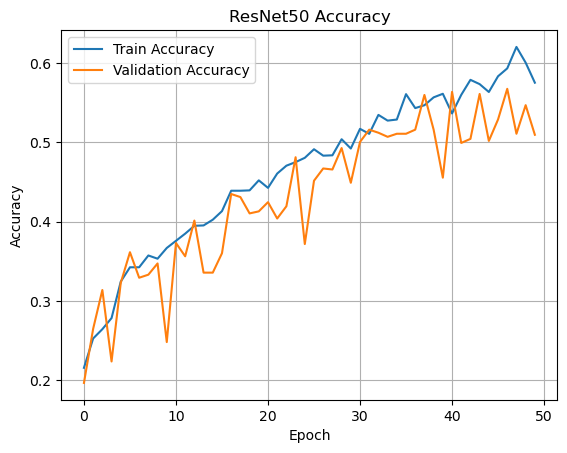

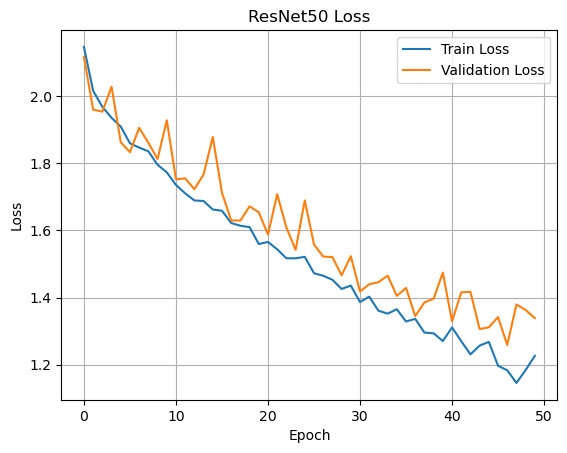

 4/26 [===>..........................] - ETA: 49s

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 81s 3s/step


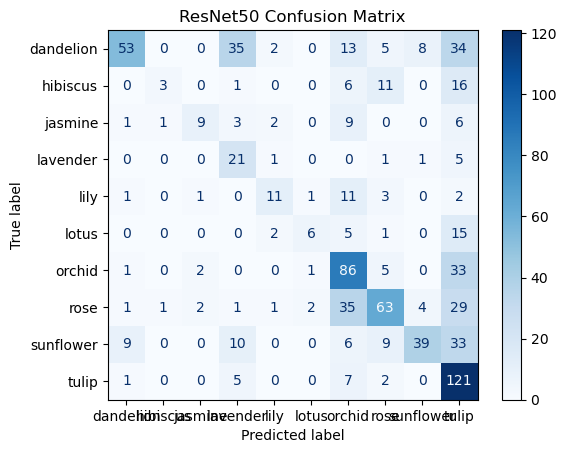

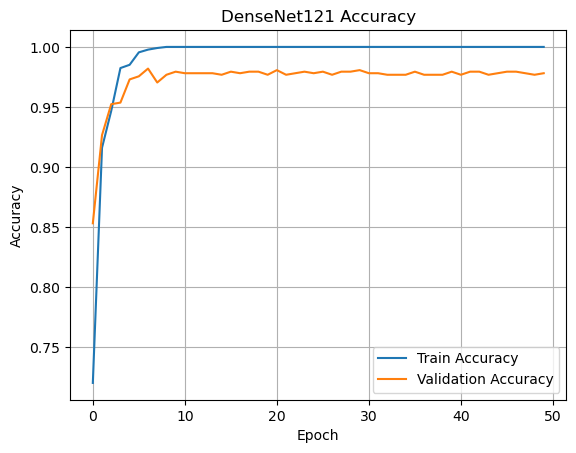

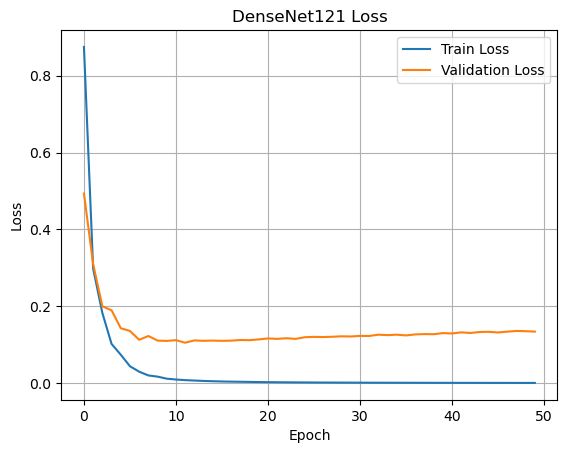

 4/26 [===>..........................] - ETA: 1:10

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 88s 3s/step


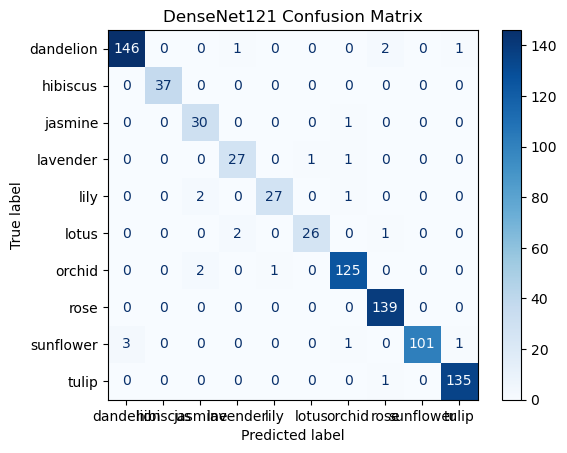

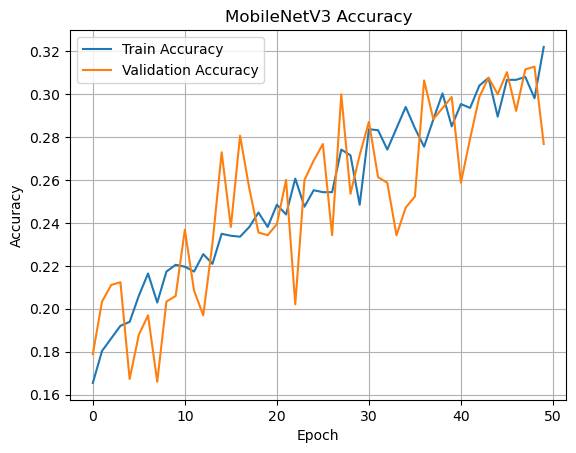

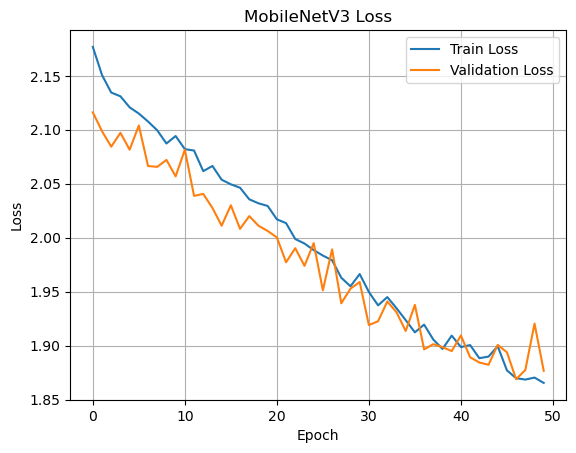

 5/26 [====>.........................] - ETA: 19s

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 33s 1s/step


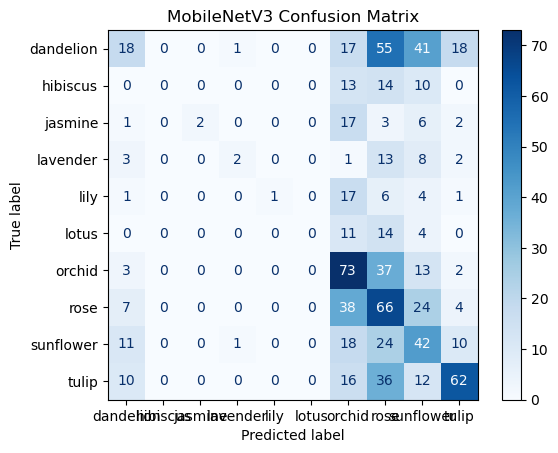

In [9]:
plot_history(resnet_history, "ResNet50")
show_confusion_matrix(resnet_model, resnet_test, "ResNet50")

plot_history(densenet_history, "DenseNet121")
show_confusion_matrix(densenet_model, densenet_test, "DenseNet121")

plot_history(mobilenet_history, "MobileNetV3")
show_confusion_matrix(mobilenet_model, mobilenet_test, "MobileNetV3")


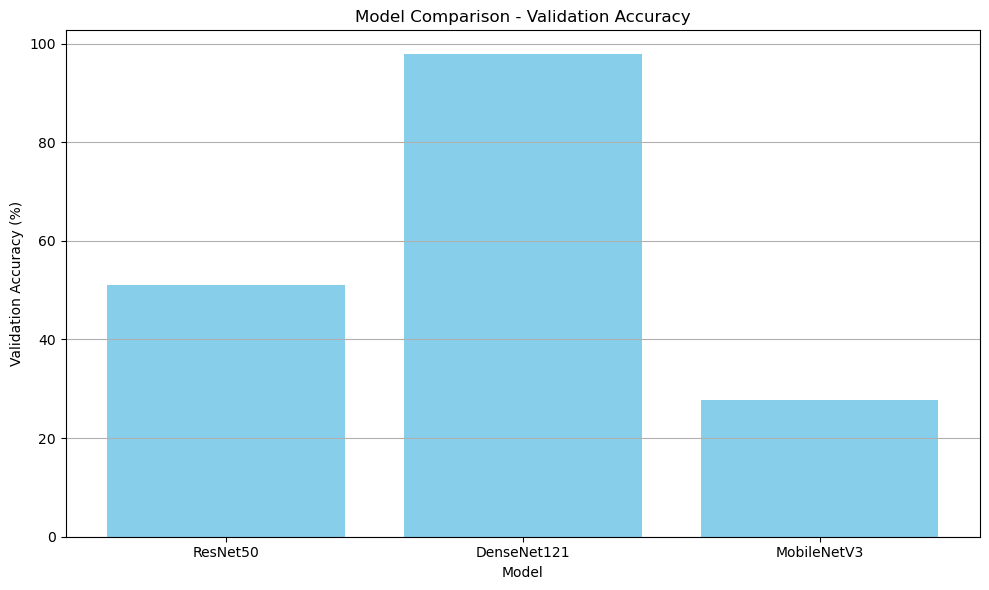

,Model,Val Accuracy (%),Training Time (s),Parameters (M),Notes
0,ResNet50,50.965250,11411,25.0,Best accuracy
1,DenseNet121,97.812098,12167,8.0,Lightweight
2,MobileNetV3,27.670527,2600,2.5,Fastest


In [12]:
# 🧠 Automatically collect model evaluation results
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure output folder exists
os.makedirs('../output/plots', exist_ok=True)

# Auto extract final validation accuracy
results = {
    'Model': ['ResNet50', 'DenseNet121', 'MobileNetV3'],
    'Val Accuracy (%)': [
        resnet_history.history['val_accuracy'][-1] * 100,
        densenet_history.history['val_accuracy'][-1] * 100,
        mobilenet_history.history['val_accuracy'][-1] * 100,
    ],
    'Training Time (s)': [
        resnet_time,
        densenet_time,
        mobilenet_time
    ],
    'Parameters (M)': [25, 8, 2.5],
    'Notes': ['Best accuracy', 'Lightweight', 'Fastest']
}

df = pd.DataFrame(results)
df.to_csv('../output/model_summary.csv', index=False)

# 📈 Plot chart
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Val Accuracy (%)'], color='skyblue')
plt.title('Model Comparison - Validation Accuracy')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../output/plots/model_comparison_accuracy.png')
plt.show()

df  # Show table in notebook


 4/26 [===>..........................] - ETA: 48s

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/26 [===>..........................] - ETA: 1:01

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 5/26 [====>.........................] - ETA: 16s

c:\Users\aliff luqman\miniconda3\envs\ai-flower-project\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 29s 1s/step


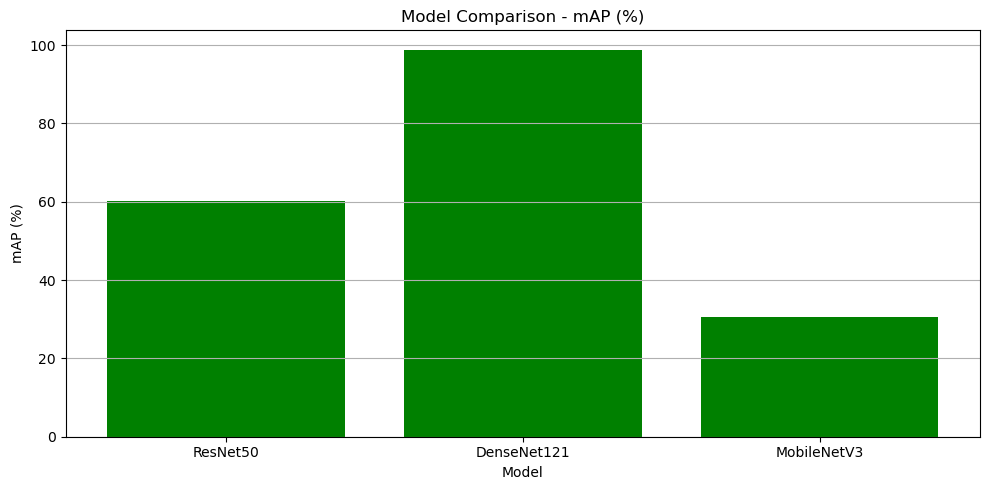

,Model,Val Accuracy (%),mAP (%),Training Time (s),Parameters (M),Notes
0,ResNet50,50.965250,60.15,11411,25.0,Best accuracy
1,DenseNet121,97.812098,98.83,12167,8.0,Lightweight
2,MobileNetV3,27.670527,30.46,2600,2.5,Fastest


In [17]:
# mAP Chart
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

# ✅ Function to calculate mAP
def calculate_mAP(model, test_data):
    y_true = test_data.classes
    y_pred = model.predict(test_data)
    y_score = y_pred  # predicted probabilities

    if y_score.shape[1] == 1:  # binary classification
        y_pred_labels = np.round(y_score).astype(int)
    else:  # multi-class
        y_pred_labels = np.argmax(y_score, axis=1)

    # One-hot encode the true labels
    y_true_onehot = np.eye(y_score.shape[1])[y_true]

    # mAP score (macro average)
    mAP = average_precision_score(y_true_onehot, y_score, average="macro")
    return round(mAP * 100, 2)

# 🎯 Calculate mAP for each model
resnet_mAP = calculate_mAP(resnet_model, resnet_test)
densenet_mAP = calculate_mAP(densenet_model, densenet_test)
mobilenet_mAP = calculate_mAP(mobilenet_model, mobilenet_test)

# 📊 Create result DataFrame
results = {
    'Model': ['ResNet50', 'DenseNet121', 'MobileNetV3'],
    'Val Accuracy (%)': [
        resnet_history.history['val_accuracy'][-1] * 100,
        densenet_history.history['val_accuracy'][-1] * 100,
        mobilenet_history.history['val_accuracy'][-1] * 100
    ],
    'mAP (%)': [resnet_mAP, densenet_mAP, mobilenet_mAP],
    'Training Time (s)': [resnet_time, densenet_time, mobilenet_time],
    'Parameters (M)': [25, 8, 2.5],
    'Notes': ['Best accuracy', 'Lightweight', 'Fastest']
}

# 💾 Save results
df = pd.DataFrame(results)
os.makedirs('../output/plots', exist_ok=True)
df.to_csv('../output/model_summary_with_mAP.csv', index=False)

# 📈 Plot mAP Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(df['Model'], df['mAP (%)'], color='green')
plt.title('Model Comparison - mAP (%)')
plt.ylabel('mAP (%)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../output/plots/model_comparison_mAP.png')
plt.show()

# 🧾 Display DataFrame
df
